/mnt/ECF4E22CF4E1F92A/Research/Code/Python_Coding_Toolbox/Data


/mnt/ECF4E22CF4E1F92A/Research/Code/Python_Coding_Toolbox/signal_processing/pitch/Analysis/signal_processing.py:268: UserWarning: shading value 'goraud' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t,f,Sgram_dB, shading = shading, cmap = colormap);


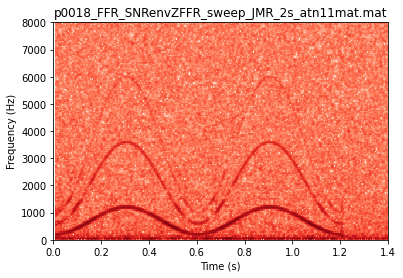

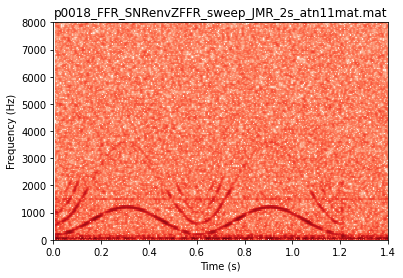

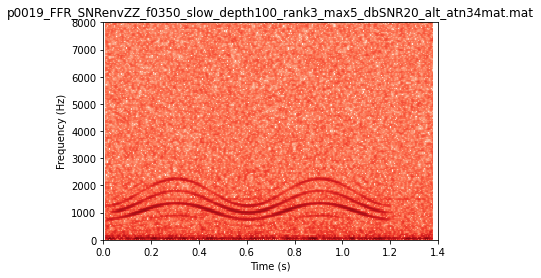

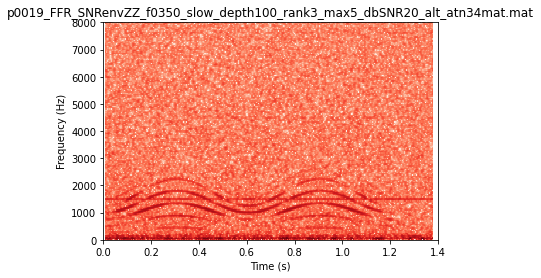

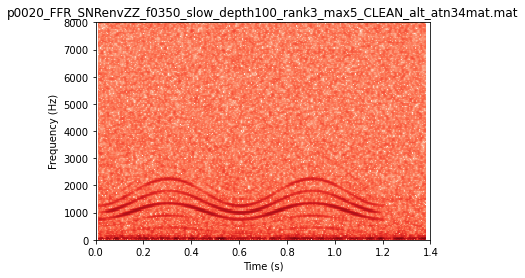

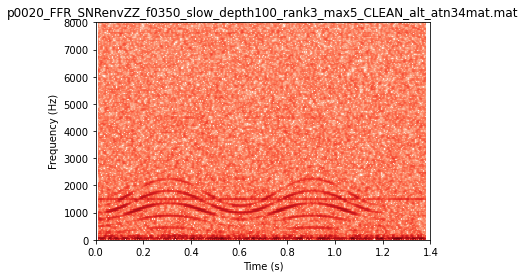

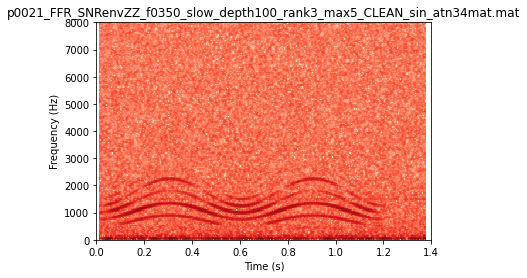

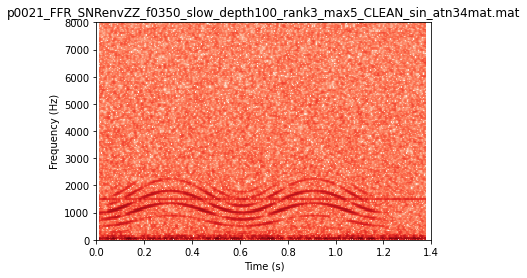

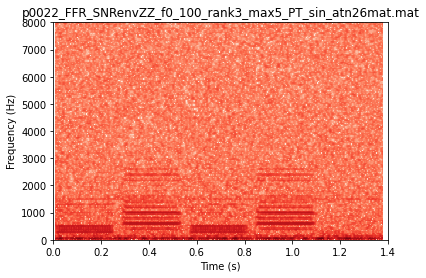

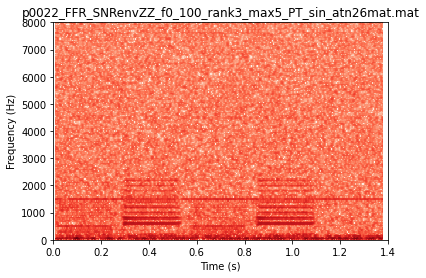

In [1]:
import os, glob
from scipy.io import loadmat
import numpy as np
from signal_processing import get_spect
#import mat73

%matplotlib inline

subject_ID = 'Q404';
cond = 'Normal';

#hacky, fix this please
data_dir = os.getcwd()[:-32]+'Data';
print(data_dir)
subj_dir = data_dir + '/FFR/' + cond + '/' + subject_ID;
os.chdir(subj_dir);

files = glob.glob('p*');

for f in files:
    mat = loadmat(f);
    fs = np.squeeze(mat['data'][0]['Stimuli'][0]['RPsamprate_Hz'][0][0]);
    pos = mat['data'][0]['AD_Data'][0]['AD_Avg_PO_V'][0][0][0]
    neg = mat['data'][0]['AD_Data'][0]['AD_Avg_NP_V'][0][0][0]
    pos_abr = np.squeeze(pos[0][0][0]);
    neg_abr = np.squeeze(neg[0][0][0]);
    pos_ecochg = np.squeeze(pos[1][0][0]);
    neg_ecochg = np.squeeze(neg[1][0][0]);
    
    env_abr = (pos_abr + neg_abr)/2; 
    tfs_abr = (pos_abr - neg_abr)/2;
    
    env_ecochg = (pos_ecochg + neg_ecochg)/2; 
    tfs_ecochg = (pos_ecochg - neg_ecochg)/2;
    
    get_spect(tfs_ecochg, fs, DR = 300, BW = 200, xlim = [0,1.4], ylim = [0,8e3], 
           colormap = 'Reds', title = f);
    get_spect(tfs_abr, fs, DR = 300, BW = 200, xlim = [0,1.4], ylim = [0,8e3], 
           colormap = 'Reds', title = f);    

